In [54]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import winsound
import random

In [55]:
df= pd.read_csv("../../data/processed/oline_merge.csv")

In [56]:
df = df[df.year >= df.draft_yr+4]
df =df[df.year != 2020]
len(df)

201

In [57]:
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df = df.drop('catchpercent',axis=1)
df = df.drop('draft_yr',axis=1)

df = df.drop('yardspergame_run',axis=1)
df = df.drop('yardsperatt',axis=1)
df = df.drop('yardspertarget',axis=1)
df = df.drop('yardsperrec',axis=1)
df = df.drop('recpergame',axis=1)
df = df.drop('yardspergame_rec',axis=1)


In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [103]:
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [104]:
loaded_model = tf.keras.models.load_model('./savedmodels/norookiednn/')
predictions = loaded_model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

MSE:  3.335409621457654
RMSE:  1.8263103847532747
MAE:  1.3321803925332953
ESV:  0.4973884956852528


In [105]:
X_scl = scaler.fit_transform(X)
predictions = loaded_model.predict(X_scl)

In [106]:
type(y)

numpy.ndarray

In [107]:
type(predictions)

numpy.ndarray

Text(0, 0.5, 'real')

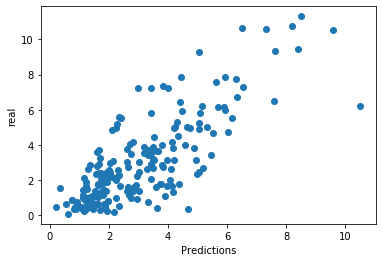

In [117]:
plt.scatter(predictions,y)
plt.xlabel("Predictions")
plt.ylabel('real')

In [109]:
Aaron_Jones2020 = np.array([26,182,201,1104,9,77,14,14,63,47,355,2,15,30,2,5,3,1])

In [110]:
rbs =pd.read_csv("../../data/rbs_to_predict.csv")
names = rbs['playername'].values
rbs = rbs.drop('tm',axis=1)
rbs = rbs.drop('playername',axis=1)

In [111]:
rbs

,age,draft_pos,attempts,yards_run,tds_run,longgain_run,g,gs,tgt,rec,yards_rec,tds_rec,firstdowns,longgain_rec,fumbles,team_adjusted_line_yards,team_running_back_yards,team_stuffed_rate
0,27,182,201,1104,9,77,14,14,63,47,355,2,15,30,2,5,3,1
1,27,73,239,955,10,69,15,13,31,25,137,0,5,18,3,30,19,25
2,26,-1,144,723,6,36,16,6,13,9,129,0,4,34,1,8,1,5
3,26,205,169,721,6,59,13,11,43,35,215,0,10,18,2,32,32,28
4,27,10,195,678,9,35,15,15,35,25,164,0,7,26,2,24,28,27
5,38,65,187,653,2,17,15,14,19,16,89,0,3,9,1,31,31,25


array([  27,  182,  201, 1104,    9,   77,   14,   14,   63,   47,  355,
          2,   15,   30,    2,    5,    3,    1], dtype=int64)

In [115]:
for i in range(len(names)):
    print(names[i])
    print(rbs.iloc[i].to_numpy())
    print(loaded_model.predict(scaler.transform(rbs.iloc[i].to_numpy().reshape(1, -1))))

Aaron Jones
[  27  182  201 1104    9   77   14   14   63   47  355    2   15   30
    2    5    3    1]
[[1.8088379]]
Kenyan Drake
[ 27  73 239 955  10  69  15  13  31  25 137   0   5  18   3  30  19  25]
[[4.765767]]
Gus Edwards
[ 26  -1 144 723   6  36  16   6  13   9 129   0   4  34   1   8   1   5]
[[0.9049221]]
James Conner
[ 26 205 169 721   6  59  13  11  43  35 215   0  10  18   2  32  32  28]
[[3.0150828]]
Todd Gurley
[ 27  10 195 678   9  35  15  15  35  25 164   0   7  26   2  24  28  27]
[[5.9434185]]
Frank Gore
[ 38  65 187 653   2  17  15  14  19  16  89   0   3   9   1  31  31  25]
[[3.064642]]
